In [1]:
scores = [
    [1],[1],[2],[2],[3],[3],[3],[4],[4],[5],[6],[6],[7],[7],[8],[8],[8],[9],[9],[10],
]
passed = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]

Text(0, 0.5, 'passed')

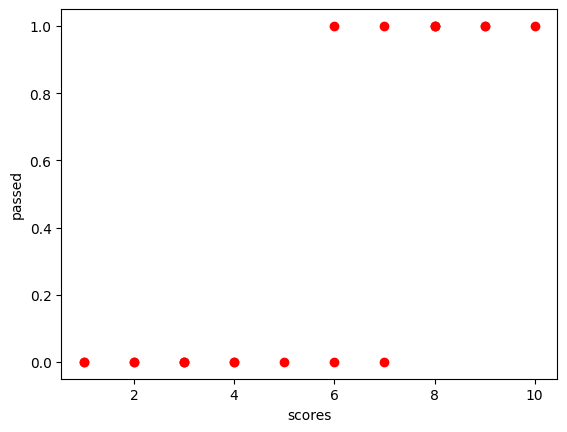

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.scatter(scores, passed, color="r")
plt.xlabel("scores")
plt.ylabel("passed")

Text(0, 0.5, 'passed')

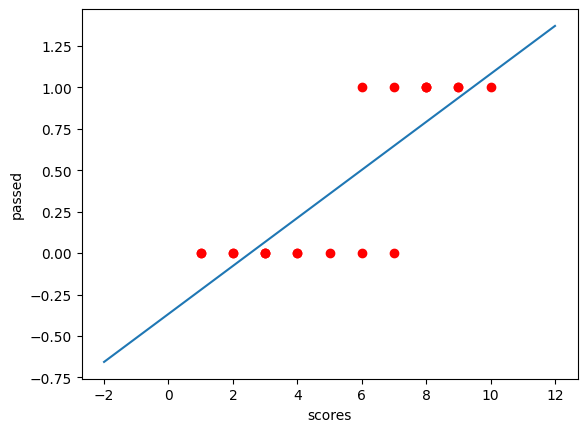

In [4]:
# 线性回归拟合
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(scores, passed)
model.coef_, model.intercept_

# 绘图
import numpy as np

x = np.linspace(-2, 12, 100)

plt.plot(x, model.coef_[0] * x + model.intercept_)
plt.scatter(scores, passed, color="r")
plt.xlabel("scores")
plt.ylabel("passed")

y值可以无穷大小，不适合0-1分类
可以发现出现错误分类

把线性函数拟合的结果使用 Sigmoid 函数压缩到0-1之间

接下来用逻辑回归训练新的数据集

In [5]:
import pandas as pd

# 加载数据集
url = 'https://cdn.aibydoing.com/hands-on-ai/files/course-8-data.csv'
storage_options = {'User-Agent': 'Mozilla/5.0'}
df = pd.read_csv(url, storage_options=storage_options, header=0)
df.head()  # 预览前 5 行数据

,X0,X1,Y
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


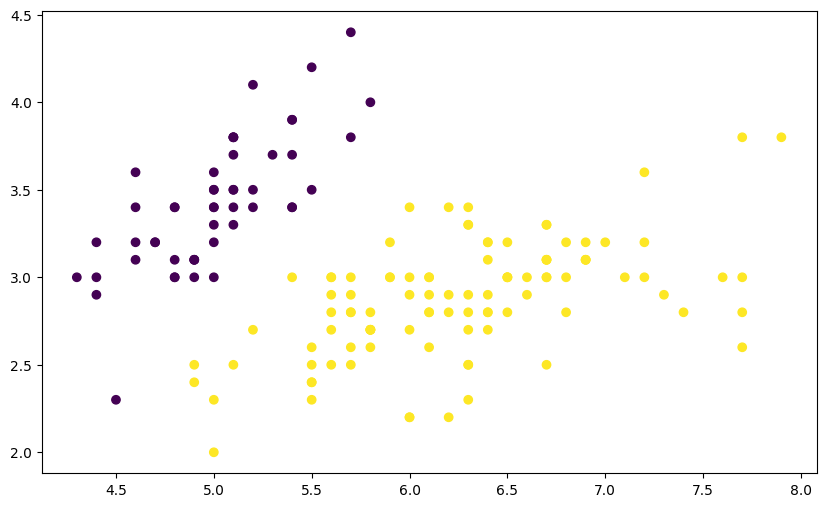

In [6]:
# 绘制数据集
plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

In [7]:
def sigmoid(z):
    # Sigmoid 分布函数
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid


def loss(h, y):
    # 损失函数
    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return loss


def gradient(X, h, y):
    # 梯度计算
    gradient = np.dot(X.T, (h - y)) / y.shape[0]
    return gradient


def Logistic_Regression(x, y, lr, num_iter):
    # 逻辑回归过程
    intercept = np.ones((x.shape[0], 1))  # 初始化截距为 1
    x = np.concatenate((intercept, x), axis=1)
    w = np.zeros(x.shape[1])  # 初始化参数为 0

    for i in range(num_iter):  # 梯度下降迭代
        z = np.dot(x, w)  # 线性函数
        h = sigmoid(z)  # sigmoid 函数

        g = gradient(x, h, y)  # 计算梯度
        w -= lr * g  # 通过学习率 lr 计算步长并执行梯度下降

        l = loss(h, y)  # 计算损失函数值

    return l, w  # 返回迭代后的梯度和参数

In [8]:
# 设定学习率和迭代次数，对数据进行训练。得到 分类边界线
x = df[["X0", "X1"]].values
y = df["Y"].values
lr = 0.01  # 学习率
num_iter = 30000  # 迭代次数

# 训练
L = Logistic_Regression(x, y, lr, num_iter)
L

(0.05103697443193302, array([-1.47673791,  4.27250311, -6.9234085 ]))

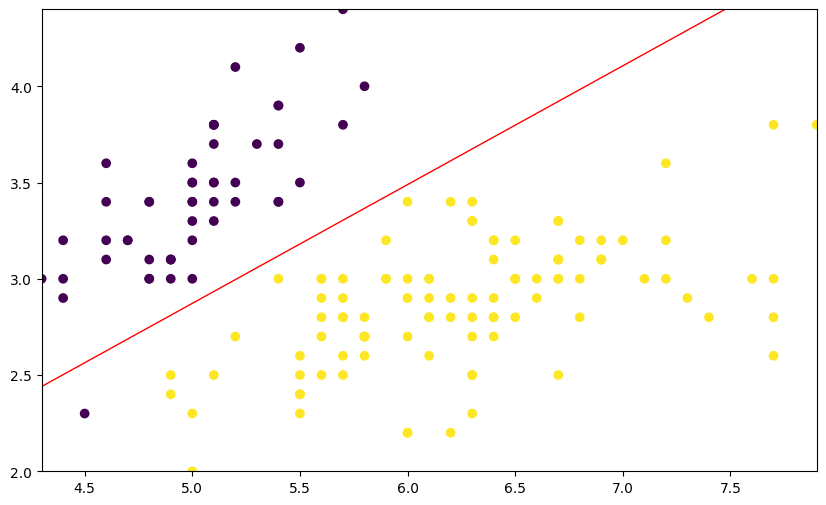

In [9]:
# 绘制 分类边界线
plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

x1_min, x1_max = (
    df["X0"].min(),
    df["X0"].max(),
)
x2_min, x2_max = (
    df["X1"].min(),
    df["X1"].max(),
)

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, np.array([L[1][1:3]]).T) + L[1][0]).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0], linewidths=1, colors="red")

Text(0, 0.5, 'Loss function')

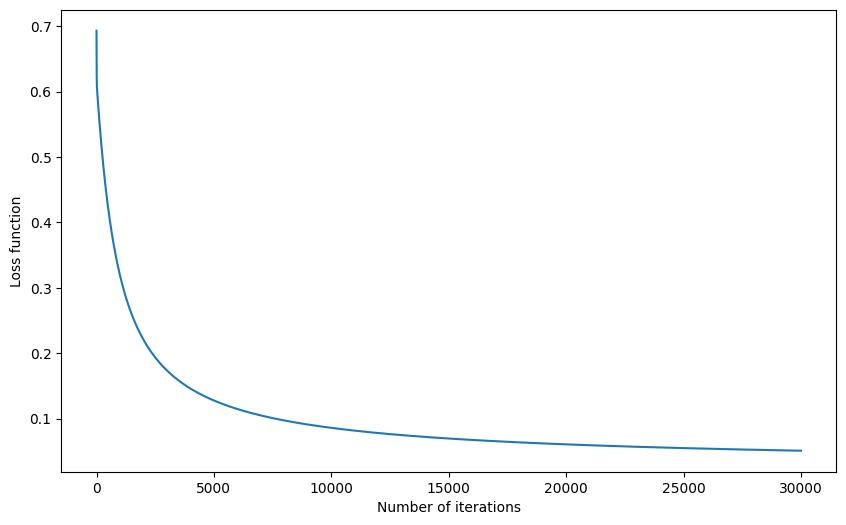

In [10]:
# 绘制 损失函数的变化过程
def Logistic_Regression_(x, y, lr, num_iter):
    intercept = np.ones((x.shape[0], 1))  # 初始化截距为 1
    x = np.concatenate((intercept, x), axis=1)
    w = np.zeros(x.shape[1])  # 初始化参数为 1

    l_list = []  # 保存损失函数值
    for i in range(num_iter):  # 梯度下降迭代
        z = np.dot(x, w)  # 线性函数
        h = sigmoid(z)  # sigmoid 函数

        g = gradient(x, h, y)  # 计算梯度
        w -= lr * g  # 通过学习率 lr 计算步长并执行梯度下降

        l = loss(h, y)  # 计算损失函数值
        l_list.append(l)

    return l_list


l_y = Logistic_Regression_(x, y, lr, num_iter)  # 训练

# 绘图
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(l_y))], l_y)
plt.xlabel("Number of iterations")
plt.ylabel("Loss function")

迭代到 20000 次之后，数据趋于稳定，也就接近于损失函数的极小值